In [1]:
import pandas as pd
import numpy as np

In [2]:
url = r'C:\Users\joth1\Desktop\project_data_helph\Project-Health-Data-Analytics\dados\estabelecimentos_saude_sao_paulo.csv'

import pandas as pd
df = pd.read_csv(url, delimiter=";")
df.head(5)

,ID,LONG,LAT,SETCENS,AREAP,CODDIST,DISTRITO,CODSUBPREF,SUBPREF,REGIAO5,...,CNES,SA_DEPADM,DEPADM,SA_TIPO,TIPO,SA_CLASSE,CLASSE,LEITOS,Unnamed: 24,Unnamed: 25
0,1,-46490063,-23522787,355030864000052,3550308005143,65,PONTE RASA,22,ERMELINO MATARAZZO,Leste,...,6393608.000000,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0,NaN,NaN
1,2,-46773393,-23673297,355030819000016,3550308005232,19,CAPAO REDONDO,17,CAMPO LIMPO,Sul,...,6194974.000000,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0,NaN,NaN
2,3,-46651898,-23531575,355030869000001,3550308005027,70,SANTA CECILIA,9,SE,Centro,...,6138314.000000,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0,NaN,NaN
3,4,-46454974,-23538945,355030837000019,3550308005202,36,ITAQUERA,27,ITAQUERA,Leste,...,6394558.000000,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0,NaN,NaN
4,5,-46539564,-23599363,355030872000050,3550308005158,74,SAO LUCAS,29,VILA PRUDENTE,Leste,...,6759998.000000,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0,NaN,NaN


In [4]:
df['CLASSE'].value_counts()

CLASSE
UBS/POSTO DE SAUDE/CENTRO DE SAUDE                   463
OUTROS ESTABELECIMENTOS E SERVICOS ESPECIALIZADOS    324
AMBULATORIOS ESPECIALIZADOS                          168
SAUDE MENTAL                                         130
URGENCIA/EMERGENCIA                                  119
HOSPITAL                                              87
APOIO DIAGNOSTICO                                     84
VIGILANCIA EM SAUDE                                   49
UNIDADES DST/AIDS                                     26
URGENCIA/ EMERGENCIA                                  16
Name: count, dtype: int64

In [4]:
import numpy as np

df['DS_CATEGORIA_UNIDADE'] = np.where(
    df['CLASSE'].isin(['HOSPITAL']), 'HOSPITAL',
    np.where(
        df['CLASSE'].isin(['UBS/POSTO DE SAUDE/CENTRO DE SAUDE']), 'UBS | POSTO DE SAUDE',
        np.where(
            df['CLASSE'].isin(['AMBULATORIOS ESPECIALIZADOS']), 'AMBULATORIOS ESPECIFICOS',
            np.where(
                df['CLASSE'] == 'SAUDE MENTAL', 'SAUDE MENTAL',
                np.where(
                    df['CLASSE'].isin(['OUTROS ESTABELECIMENTOS E SERVICOS ESPECIALIZADOS', 'URGENCIA/EMERGENCIA', 'APOIO DIAGNOSTICO', 'VIGILANCIA EM SAUDE', 'URGENCIA/ EMERGENCIA']), 'OUTROS ESTABELECIMENTOS E SERVICOS ESPECIALIZADOS',
                    np.where(
                        df['CLASSE'] == 'UNIDADES DST/AIDS', 'UNIDADES DE DST/AIDS',
                        'OUTROS'
                    )
                )
            )
        )
    )
)


In [5]:
df['DS_CATEGORIA_UNIDADE'].value_counts()

DS_CATEGORIA_UNIDADE
OUTROS ESTABELECIMENTOS E SERVICOS ESPECIALIZADOS    592
UBS | POSTO DE SAUDE                                 463
AMBULATORIOS ESPECIFICOS                             168
SAUDE MENTAL                                         130
HOSPITAL                                              87
UNIDADES DE DST/AIDS                                  26
Name: count, dtype: int64

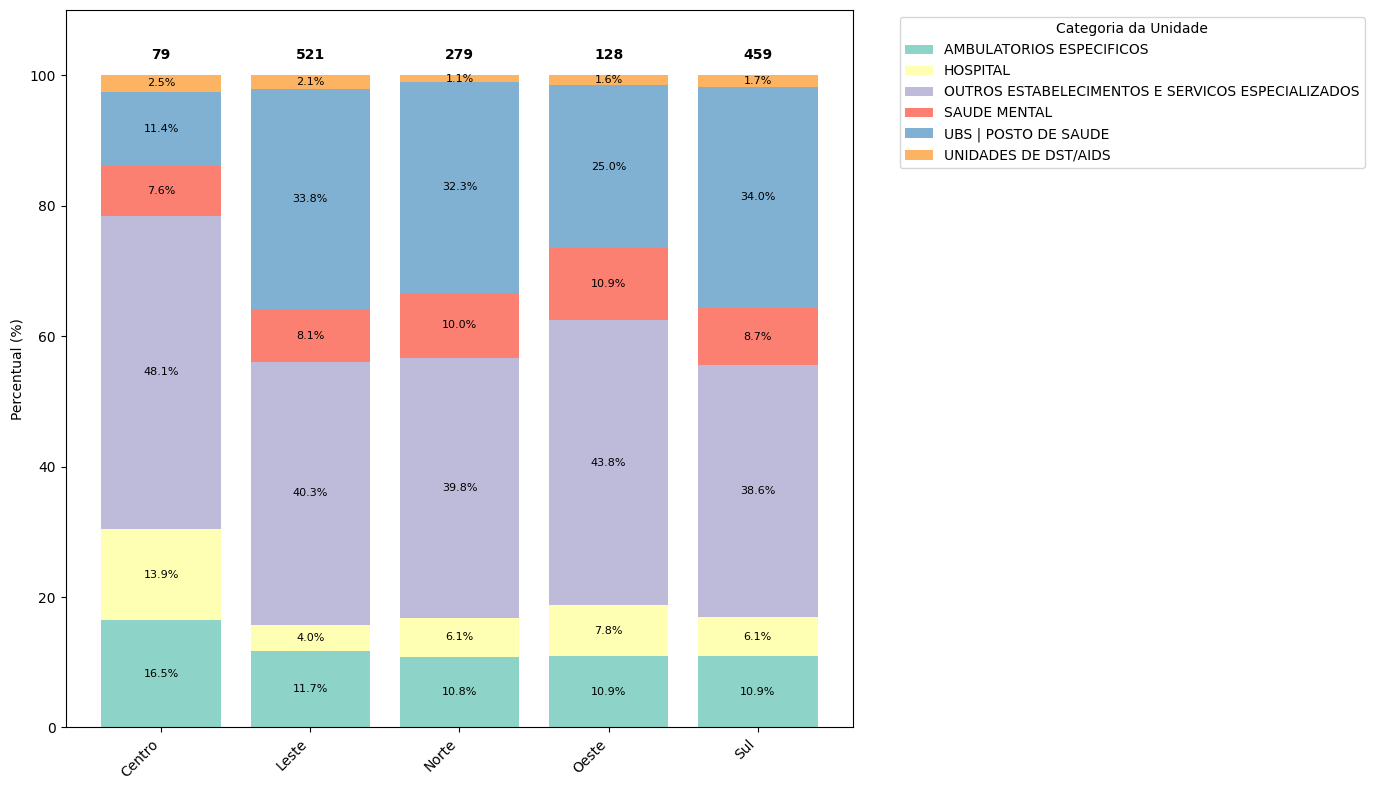

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo de DF:
# df = pd.read_csv('seuarquivo.csv')

# Agrupar para contar quantas categorias tem em cada Região
tabela = df.groupby(['REGIAO5', 'DS_CATEGORIA_UNIDADE']).size().unstack(fill_value=0)

# Agora transformar para percentual por linha (por Região)
tabela_percent = tabela.div(tabela.sum(axis=1), axis=0) * 100

# Plotar gráfico empilhado 100%
fig, ax = plt.subplots(figsize=(14, 8))

bottoms = pd.Series([0]*len(tabela_percent), index=tabela_percent.index)

cores = plt.cm.Set3.colors  # paleta de cores automática

for idx, coluna in enumerate(tabela_percent.columns):
    bars = ax.bar(tabela_percent.index, tabela_percent[coluna], bottom=bottoms, label=coluna, color=cores[idx % len(cores)])

    # Adicionar % no meio da barra
    for i, (valor, bottom) in enumerate(zip(tabela_percent[coluna], bottoms)):
        if valor > 1:  # Só se for maior que 5% para não poluir
            ax.text(i, bottom + valor/2, f'{valor:.1f}%', ha='center', va='center', color='black', fontsize=8)

    bottoms += tabela_percent[coluna]

# Adicionar valor bruto (total) em cima da barra
totais = tabela.sum(axis=1)
for i, total in enumerate(totais):
    ax.text(i, 102, f'{total}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Estética
ax.set_ylim(0, 110)
ax.set_ylabel('Percentual (%)')
# ax.set_title('Distribuição das Unidades de Saúde por região')
ax.legend(title='Categoria da Unidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [84]:
df_pessoas_por_regiao = pd.read_csv(r'C:\Users\joth1\Desktop\project_data_helph\Project-Health-Data-Analytics\01_analises\estudo_saude_regiao.csv', encoding='utf-8', delimiter=',')

def coluna(row):
    if row['DS_ZONA_SP'] == 'Zona Leste':
        return 'Leste'
    else:
        return row['DS_ZONA_SP']  # ou outro valor que você quiser para os outros casos

df_pessoas_por_regiao['DS_ZONA'] = df_pessoas_por_regiao.apply(coluna, axis=1)
df_pessoas_por_regiao

,DISTRITO,POP. TOTAL 2022,POP. URB. 2022,CIDADE,DS_ZONA_SP,ENDERECO,QT_HOMENS_<=19,QT_HOMENS_20_34,QT_HOMENS_34_50,QT_HOMENS_50_64,QT_HOMENS_65+,QT_MULHERES_<=19,QT_MULHERES_20_34,QT_MULHERES_34_50,QT_MULHERES_50_64,QT_MULHERES_65+,TOTAL_HOMENS,TOTAL_MULHERES,TOTAL_GERAL,DS_ZONA
0,ALTO DE PINHEIROS,37359,37359,São Paulo,Zona Oeste,[NaN],11934,3533,1933,695,81,11907,3863,2262,982,164,18178,19180,37359,Zona Oeste
1,ANHANGUERA,75360,75061,São Paulo,Zona Oeste,[NaN],24074,7127,3900,1403,163,24019,7793,4563,1982,331,36669,38690,75360,Zona Oeste
2,ARICANDUVA,89574,89574,São Paulo,Zona Leste,"[""JOAO DE OLIVEIRA MELLO,CEL,R,440"", ""MIGUEL B...",28614,8471,4635,1668,194,28549,9263,5424,2356,393,43586,45987,89574,Leste
3,ARTUR ALVIM,95575,95575,São Paulo,Zona Leste,"[""NICOLO TARTAGLIA,R,45"", ""FRANCISCO DE TOLEDO...",30532,9039,4946,1780,207,30462,9884,5787,2514,420,46506,49068,95575,Leste
4,BARRA FUNDA,33436,33436,São Paulo,Zona Central,[NaN],10681,3162,1730,622,72,10656,3457,2024,879,147,16269,17166,33436,Zona Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,VILA MATILDE,103558,103558,São Paulo,Zona Leste,"[""ALVES MALDONADO,R,128"", ""HERCIILIA,R,452"", ""...",33082,9794,5359,1929,225,33006,10709,6271,2724,455,50390,53167,103558,Leste
92,VILA MEDEIROS,114939,114939,São Paulo,Zona Norte,[NaN],36717,10870,5948,2141,250,36634,11886,6960,3023,505,55928,59010,114939,Zona Norte
93,VILA PRUDENTE,105690,105690,São Paulo,Zona Leste,"[""CENTENARIO DE V PRUDENTE,PCA,108"", ""SAO JANU...",33763,9996,5469,1968,229,33686,10930,6400,2780,464,51427,54262,105690,Leste
94,VILA SÔNIA,123748,123748,São Paulo,Zona Sul,[NaN],39532,11704,6404,2305,269,39441,12797,7493,3255,544,60214,63533,123747,Zona Sul


In [8]:
df_leste = df.loc[ (df['DS_CATEGORIA_UNIDADE'] == 'HOSPITAL') 
                  & (df['REGIAO5'] == 'Leste')]

df_leste.dtypes, 
df_leste = df_leste[['ENDERECO', 'DISTRITO', 'DS_CATEGORIA_UNIDADE', 'CLASSE']]
df_leste

# df_leste = df_leste.groupby('DISTRITO').agg(
#     QTD=('DISTRITO', 'count')
#     ,leitos=('LEITOS', 'sum')
# ).reset_index()

# df_leste.columns = df_leste.columns.str.upper()

,ENDERECO,DISTRITO,DS_CATEGORIA_UNIDADE,CLASSE
385,"METALURGICOS,DOS,AV,1797",CIDADE TIRADENTES,HOSPITAL,HOSPITAL
386,"VACANGA,R,300",CARRAO,HOSPITAL,HOSPITAL
396,"ALCANTARA MACHADO,AV,2576",MOOCA,HOSPITAL,HOSPITAL
397,"PASCOAL MOREIRA,R,486",MOOCA,HOSPITAL,HOSPITAL
407,"SOCRATES,GAL,R,145",PENHA,HOSPITAL,HOSPITAL
422,"MANUEL FRANCA DOS SANTOS.AV,174",SAPOPEMBA,HOSPITAL,HOSPITAL
424,"ALVES MALDONADO,R,128",VILA MATILDE,HOSPITAL,HOSPITAL
425,"RODRIGO DE BRUN,AL,1989",ERMELINO MATARAZZO,HOSPITAL,HOSPITAL
430,"ANTONIO LAZARO,R,226",SAPOPEMBA,HOSPITAL,HOSPITAL
432,"SIQUEIRA BUENO,R,1757",BELEM,HOSPITAL,HOSPITAL


In [50]:
df_pessoas_por_regiao

,DISTRITO,POP. TOTAL 2022,POP. URB. 2022,CIDADE,DS_ZONA_SP,ENDERECO,QT_HOMENS_<=19,QT_HOMENS_20_34,QT_HOMENS_34_50,QT_HOMENS_50_64,QT_HOMENS_65+,QT_MULHERES_<=19,QT_MULHERES_20_34,QT_MULHERES_34_50,QT_MULHERES_50_64,QT_MULHERES_65+,TOTAL_HOMENS,TOTAL_MULHERES,TOTAL_GERAL,DS_ZONA
0,ALTO DE PINHEIROS,37359,37359,São Paulo,Zona Oeste,[NaN],11934,3533,1933,695,81,11907,3863,2262,982,164,18178,19180,37359,Zona Oeste
1,ANHANGUERA,75360,75061,São Paulo,Zona Oeste,[NaN],24074,7127,3900,1403,163,24019,7793,4563,1982,331,36669,38690,75360,Zona Oeste
2,ARICANDUVA,89574,89574,São Paulo,Zona Leste,"[""JOAO DE OLIVEIRA MELLO,CEL,R,440"", ""MIGUEL B...",28614,8471,4635,1668,194,28549,9263,5424,2356,393,43586,45987,89574,Leste
3,ARTUR ALVIM,95575,95575,São Paulo,Zona Leste,"[""NICOLO TARTAGLIA,R,45"", ""FRANCISCO DE TOLEDO...",30532,9039,4946,1780,207,30462,9884,5787,2514,420,46506,49068,95575,Leste
4,BARRA FUNDA,33436,33436,São Paulo,Zona Central,[NaN],10681,3162,1730,622,72,10656,3457,2024,879,147,16269,17166,33436,Zona Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,VILA MATILDE,103558,103558,São Paulo,Zona Leste,"[""ALVES MALDONADO,R,128"", ""HERCIILIA,R,452"", ""...",33082,9794,5359,1929,225,33006,10709,6271,2724,455,50390,53167,103558,Leste
92,VILA MEDEIROS,114939,114939,São Paulo,Zona Norte,[NaN],36717,10870,5948,2141,250,36634,11886,6960,3023,505,55928,59010,114939,Zona Norte
93,VILA PRUDENTE,105690,105690,São Paulo,Zona Leste,"[""CENTENARIO DE V PRUDENTE,PCA,108"", ""SAO JANU...",33763,9996,5469,1968,229,33686,10930,6400,2780,464,51427,54262,105690,Leste
94,VILA SÔNIA,123748,123748,São Paulo,Zona Sul,[NaN],39532,11704,6404,2305,269,39441,12797,7493,3255,544,60214,63533,123747,Zona Sul


In [51]:
# = 4.036.605 / 21 Hospitais =~ Aproximadamente 200.000 por hospital

df_final = pd.merge(df_leste, df_pessoas_por_regiao, left_on='DISTRITO', right_on='DISTRITO', how='inner')
df_final



,DISTRITO,QTD,LEITOS,POP. TOTAL 2022,POP. URB. 2022,CIDADE,DS_ZONA_SP,ENDERECO,QT_HOMENS_<=19,QT_HOMENS_20_34,...,QT_HOMENS_65+,QT_MULHERES_<=19,QT_MULHERES_20_34,QT_MULHERES_34_50,QT_MULHERES_50_64,QT_MULHERES_65+,TOTAL_HOMENS,TOTAL_MULHERES,TOTAL_GERAL,DS_ZONA
0,BELA VISTA,3,793,60024,60024,São Paulo,Zona Central,[NaN],19175,5677,...,130,19131,6207,3634,1579,263,29207,30816,60024,Zona Central
1,CACHOEIRINHA,2,359,143366,143366,São Paulo,Zona Oeste,[NaN],45799,13559,...,311,45694,14826,8681,3771,630,69760,73605,143366,Zona Oeste
2,CAMBUCI,1,14,45163,45163,São Paulo,Zona Sul,[NaN],14427,4271,...,98,14394,4670,2734,1188,198,21975,23187,45163,Zona Sul
3,CAMPO GRANDE,1,213,115925,115925,São Paulo,Zona Sul,[NaN],37032,10964,...,252,36948,11988,7019,3049,509,56408,59516,115925,Zona Sul
4,CIDADE DUTRA,1,141,182459,182438,São Paulo,Zona Sul,[NaN],58287,17256,...,396,58154,18869,11048,4799,802,88783,93675,182459,Zona Sul
5,CIDADE TIRADENTES,1,223,194177,194160,São Paulo,Zona Leste,"[""CADERNO DE VIAGEM,R,55"", ""FRANCISCO CARDOSO ...",62031,18365,...,422,61889,20081,11758,5108,854,94485,99691,194177,Leste
6,ERMELINO MATARAZZO,1,280,112333,112333,São Paulo,Zona Leste,"[""JOSE GOES NOGUEIRA,R,70"", ""RODRIGO DE BRUM,A...",35885,10624,...,244,35803,11617,6802,2955,494,54660,57672,112333,Leste
7,GUAIANASES,1,263,109316,109264,São Paulo,Zona Leste,"[""MACABU,R,35"", ""UTARO KANAI,R,286"", ""EVALDO C...",34921,10339,...,237,34842,11305,6619,2875,480,53192,56123,109316,Leste
8,IPIRANGA,4,343,116271,116271,São Paulo,Zona Sul,[NaN],37143,10996,...,252,37058,12024,7040,3058,511,56576,59694,116271,Zona Sul
9,ITAIM PAULISTA,1,307,205295,205295,São Paulo,Zona Leste,"[""MARECHAL TITO,AV,6035"", ""JOSE DA CRUZ CAMARG...",65582,19416,...,446,65433,21231,12431,5400,902,99894,105400,205294,Leste


In [61]:
# 7 Bairro não possuem Hospitais, logo terei que fazer a inferencia de onde as pessoas se encaminham quando estão doentes 
df_final['pressao_por_bairro'] = (df_final['TOTAL_GERAL'].fillna('0').astype(int)/df_final['LEITOS'].fillna('0').astype(int))
df_final2 = df_final.sort_values(by='pressao_por_bairro', ascending=False)
df_final2 = df_final2[['LEITOS', 'pressao_por_bairro', 'DISTRITO', 'TOTAL_GERAL', 'DS_ZONA_SP']]
df_final2 = df_final2.loc[ df_final2['LEITOS'] != 0 ]
df_final2 = df_final2.sort_values(by='pressao_por_bairro', ascending=False)
df_final2['fl_zona_leste'] = np.where(df_final2['DS_ZONA_SP'] == 'Zona Leste', 1, 0)
df_final2.head(50)

,LEITOS,pressao_por_bairro,DISTRITO,TOTAL_GERAL,DS_ZONA_SP,fl_zona_leste
2,14,3225.928571,CAMBUCI,45163,Zona Sul,0
28,42,2465.666667,VILA MATILDE,103558,Zona Leste,1
21,81,1625.074074,RIO PEQUENO,131631,Zona Oeste,0
4,141,1294.035461,CIDADE DUTRA,182459,Zona Sul,0
10,185,1140.324324,ITAQUERA,210960,Zona Leste,1
24,249,1071.144578,SAPOPEMBA,266715,Zona Leste,1
5,223,870.748879,CIDADE TIRADENTES,194177,Zona Leste,1
20,239,751.983264,PIRITUBA,179724,Zona Oeste,0
9,307,668.710098,ITAIM PAULISTA,205294,Zona Leste,1
19,203,652.472906,PENHA,132452,Zona Leste,1


C:\Users\joth1\AppData\Local\Temp\ipykernel_7240\1385341175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pressao_por_bairro', y='DISTRITO', data=df_final2.sort_values('pressao_por_bairro', ascending=False),


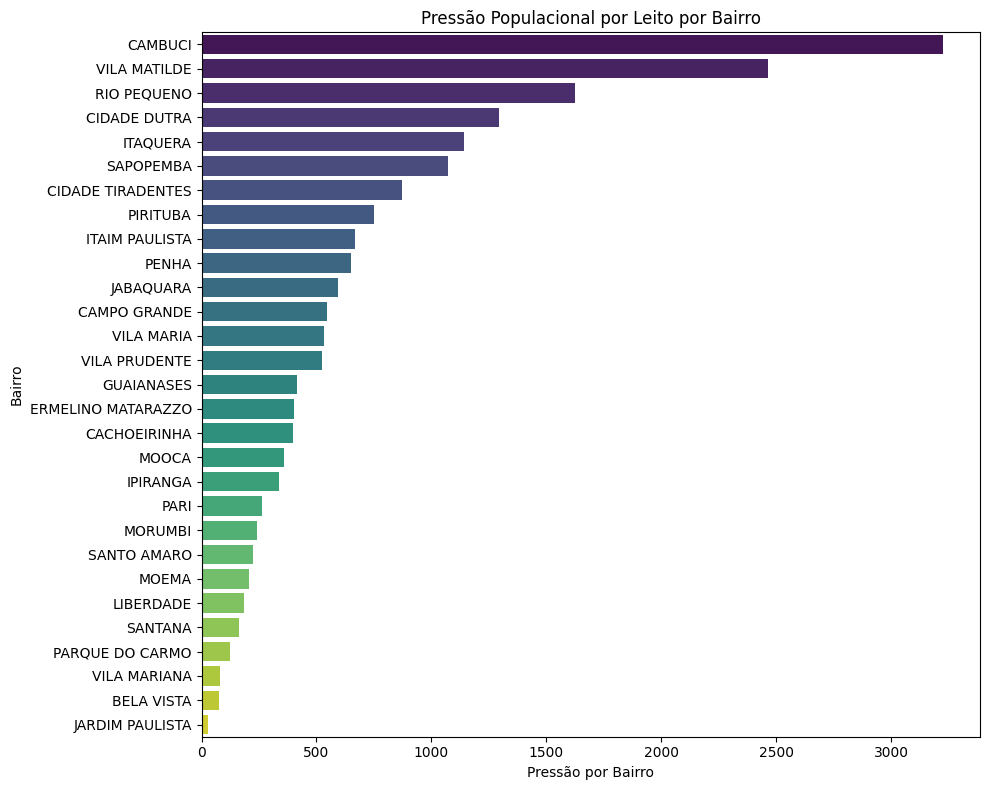

In [59]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x='pressao_por_bairro', y='DISTRITO', data=df_final2.sort_values('pressao_por_bairro', ascending=False),
            palette='viridis')

plt.title('Pressão Populacional por Leito por Bairro')
plt.xlabel('Pressão por Bairro')
plt.ylabel('Bairro')
plt.tight_layout()
plt.show()

In [73]:
df

,ID,LONG,LAT,SETCENS,AREAP,CODDIST,DISTRITO,CODSUBPREF,SUBPREF,REGIAO5,...,SA_DEPADM,DEPADM,SA_TIPO,TIPO,SA_CLASSE,CLASSE,LEITOS,Unnamed: 24,Unnamed: 25,DS_CATEGORIA_UNIDADE
0,1,-46490063,-23522787,355030864000052,3550308005143,65,PONTE RASA,22,ERMELINO MATARAZZO,Leste,...,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0,NaN,NaN,AMBULATORIOS ESPECIFICOS
1,2,-46773393,-23673297,355030819000016,3550308005232,19,CAPAO REDONDO,17,CAMPO LIMPO,Sul,...,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0,NaN,NaN,AMBULATORIOS ESPECIFICOS
2,3,-46651898,-23531575,355030869000001,3550308005027,70,SANTA CECILIA,9,SE,Centro,...,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0,NaN,NaN,AMBULATORIOS ESPECIFICOS
3,4,-46454974,-23538945,355030837000019,3550308005202,36,ITAQUERA,27,ITAQUERA,Leste,...,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0,NaN,NaN,AMBULATORIOS ESPECIFICOS
4,5,-46539564,-23599363,355030872000050,3550308005158,74,SAO LUCAS,29,VILA PRUDENTE,Leste,...,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0,NaN,NaN,AMBULATORIOS ESPECIFICOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,1463,-46623105,-23462448,355030881000093,3550308005133,83,TREMEMBE,6,JACANA-TREMEMBE,Norte,...,1,Municipal,17,UNIDADE DE REFERENCIA SAUDE DO IDOSO,1,AMBULATORIOS ESPECIALIZADOS,0,NaN,NaN,AMBULATORIOS ESPECIFICOS
1462,1464,-46603666,-23555505,355030853000023,3550308005018,54,MOOCA,25,MOOCA,Leste,...,1,Municipal,17,UNIDADE DE REFERENCIA SAUDE DO IDOSO,1,AMBULATORIOS ESPECIALIZADOS,0,NaN,NaN,AMBULATORIOS ESPECIFICOS
1463,1465,-46709954,-23641851,355030871000035,3550308005174,72,SANTO AMARO,14,SANTO AMARO,Sul,...,1,Municipal,17,UNIDADE DE REFERENCIA SAUDE DO IDOSO,1,AMBULATORIOS ESPECIALIZADOS,0,NaN,NaN,AMBULATORIOS ESPECIFICOS
1464,1466,-46651898,-23531575,355030869000001,3550308005027,70,SANTA CECILIA,9,SE,Centro,...,1,Municipal,17,UNIDADE DE REFERENCIA SAUDE DO IDOSO,1,AMBULATORIOS ESPECIALIZADOS,0,NaN,NaN,AMBULATORIOS ESPECIFICOS


### Número de unidades por bairro 

In [ ]:
df['DS_CATEGORIA_UNIDADE'].value_counts()



DS_CATEGORIA_UNIDADE
OUTROS ESTABELECIMENTOS E SERVICOS ESPECIALIZADOS    592
UBS | POSTO DE SAUDE                                 463
AMBULATORIOS ESPECIFICOS                             168
SAUDE MENTAL                                         130
HOSPITAL                                              87
UNIDADES DE DST/AIDS                                  26
Name: count, dtype: int64

In [82]:
# df2 = df.loc[df['DS_CATEGORIA_UNIDADE'].isin(['UBS | POSTO DE SAUDE', 'HOSPITAL'])]
df2 = df.loc[df['DS_CATEGORIA_UNIDADE'].isin(['HOSPITAL'])]

# df_num = df2.groupby(['DISTRITO', 'REGIAO5']).agg(
#     QTD=('DS_CATEGORIA_UNIDADE', 'count')
#     ,LEITOS=('LEITOS', 'sum')
# ).reset_index()
# df_num = df_num.sort_values(by='QTD', ascending=False)
# df_num.head(50)


df_num = df2.groupby(['REGIAO5']).agg(
    QTD=('DS_CATEGORIA_UNIDADE', 'count')
    ,LEITOS=('LEITOS', 'sum')
).reset_index()
df_num = df_num.sort_values(by='QTD', ascending=False)
df_num.head(50)

,REGIAO5,QTD,LEITOS
4,Sul,28,4739
1,Leste,21,3992
2,Norte,17,2590
0,Centro,11,2433
3,Oeste,10,3497
